# 多元统计分析

## 聚类分析

### 特点：

- 事先不知道类别的个数与结构；
- 进行分析的数据是对象间的相似性或相异性（距离）；
- 将距离近的对象归入一类。

### 分类

- 根据分类对象不同分为

  - Q型聚类：对样本进行聚类

  - R型聚类：对变量进行聚类

- 根据聚类方法主要分为

  - 系统聚类法
  - 动态聚类法

### 距离

#### Minikowski距离：

$$
d(x,y) = [\sum\limits_{k=1}^p|x_{k} - y_{k}|^{m}]^{\frac{1}{m}}，  x,y为p维列向量
$$

- m = 1时，为绝对距离
- m = 2时，为欧氏距离
- m = $\infty$,  为切比雪夫距离，即 $\mathop{max}\limits_{1\le k \le p}|x_{k} - y_{k}|$

#### Mahalanobis距离(聚类分析中常用)

$$
d(x,y) = \sqrt{(x - y)^{T} \sum\nolimits^{-1} (x - y)}
$$

其中x, y为来自 p 维总体Z的样本观测值，Σ为Z 的协方差矩阵，实际中Σ往往是不知道的，常常需要用样本协方差来估计。马氏距离对一切线性变换是不变的，故不受量纲的影响。 


#### R语句 
```R
dist(x,method=“euclidean”, diag=FALSE, upper=FALSE, p=2)
```

- method: 计算距离的方法

  - “euclidean”: 欧式距离

  - “maximum”: Chebyshev距离

  - “manhattan”: 绝对值距离

  - “minkowski”: Minkowski距离，p是Minkowski距离的阶数

- diag=TRUE: 输出对角线上的距离
- upper=TRUE: 输出上三角矩阵的值（默认值仅输出下 三角矩阵的值）
  
#### Python语句

```python
import rpy2.robjects as robjects

x = [1, 2, 6, 8, 11]
r = robjects.r
res = r.dist(x)
print(res)
#    1  2  3  4
# 2  1
# 3  5  4
# 4  7  6  2
# 5 10  9  5  3
```

```python
import rpy2
import rpy2.robjects.numpy2ri

R = rpy2.robjects.r
r_code = """
x<-c(1,2,6,8,11)
y<-dist(x)
print(y)
"""
R(r_code)
```
### 注
我用rpy2来实现这个感觉比较费劲。可能不太能从python 调用R语言，建议直接用R语言吧

In [3]:
# 示例
x <- c(1, 2, 6, 8, 11)
res <- dist(x, method = "euclidean", diag = FALSE, upper = FALSE, p = 2)
print(res)

   1  2  3  4
2  1         
3  5  4      
4  7  6  2   
5 10  9  5  3


## 标准化处理

### 标准化处理

当指标的测量值相差悬殊时，应先对数据进行标准化处理，再利用标准化的数据计算距离。

#### 普通标准化变换

$$
X_{ij}^{*} = \frac{X_{ij} - \overline{X}_{j}}{S_{j}}
$$


i=1,2,…n表示第i个样本，j=1,2,…p表示样本的第j个指标，每个样本均有p个观测指标.       是第j个指标的样本均值

#### 极差标准化变换

$$
X_{ij}^{*} = \frac{X_{ij} - \overline{X}_{j}}{R_{j}} \\
其中，R_{j} = \mathop{\max}\limits_{1\le k \le n}X_{kj} - \mathop{\max}\limits_{1 \le k \le n}X_{kj}
$$

#### 极差正规化变换

$$
X_{ij}^{*} = \frac{X_{ij} - \mathop{\min}\limits_{1\le k\le n} X_{kj}}{R_{j}}
$$

##### 数据的中心化和标准化处理

###### R语句

```R
scale(X,center = True, scale = True)
```

- X:样本数据矩阵 
- center = TURE表示对数据做中心化变换
- scale=TRUE表示对数据做标准化变化

###### Python语句

```python
import rpy2
import numpy
import rpy2.robjects.numpy2ri

rpy2.robjects.numpy2ri.activate()

R = rpy2.robjects.r
x = numpy.array([[1.0, 2.0], [3.0, 1.0]])
res = R.scale(x, center=True, scale=True)
print(res)
```

##### 对数据做极差标准化处理

In [4]:

x <- data.frame(
    points = c(99, 97, 104, 79, 84, 88, 91, 99),
    rebounds = c(34, 40, 41, 38, 29, 30, 22, 25),
    blocks = c(12, 8, 8, 7, 8, 11, 6, 7)
)
# apply（）函数必须应用于dataframe或matrix
center <- sweep(x, 2, apply(x, 2, mean))
R <- apply(x, 2, max) - apply(x, 2, min)
x_star <- sweep(center, 2, R, "/")
# 若x_star<-sweep(center, 2, sd(x), "/"), 则得到（普通）标准化变换后的数据；
print(x_star)

  points    rebounds     blocks
1  0.255  0.08552632  0.6041667
2  0.175  0.40131579 -0.0625000
3  0.455  0.45394737 -0.0625000
4 -0.545  0.29605263 -0.2291667
5 -0.345 -0.17763158 -0.0625000
6 -0.185 -0.12500000  0.4375000
7 -0.065 -0.54605263 -0.3958333
8  0.255 -0.38815789 -0.2291667


sweep(x, MARGIN, STATS, FUN="-", ...)

 - x:数组或矩阵；MARGIN:运算区域，对矩阵1表示行，2表示列；

 - STATS是统计量，apply(x, 2, mean)表示各列的均值；

 - FUN表示函数的运算，缺省值为减法运算。

### 系统聚类法

#### 聚类分析方法中最常用

#### 基本思想

- （1）视各样本（或变量）自成一类，规定类与类之间的距离（或相似系数）；
- （2）把最相似的样本（或变量）聚为小类，再将已聚合的小类按相似性再聚合；
- （3）最后将一切子类都聚合到一个大类，从而得到一个按相似性大小聚集起来的谱系关系

#### 3.根据距离定义的不同分为

- （1）最短距离法：类与类之间的距离定义为两类中最近样本间的距离；
- （2）最长距离法：类与类之间的距离定义为两类中最远样本间的距离；
- （3）类平均法：类与类之间的距离定义为两类中两两样本间距离的平均数；

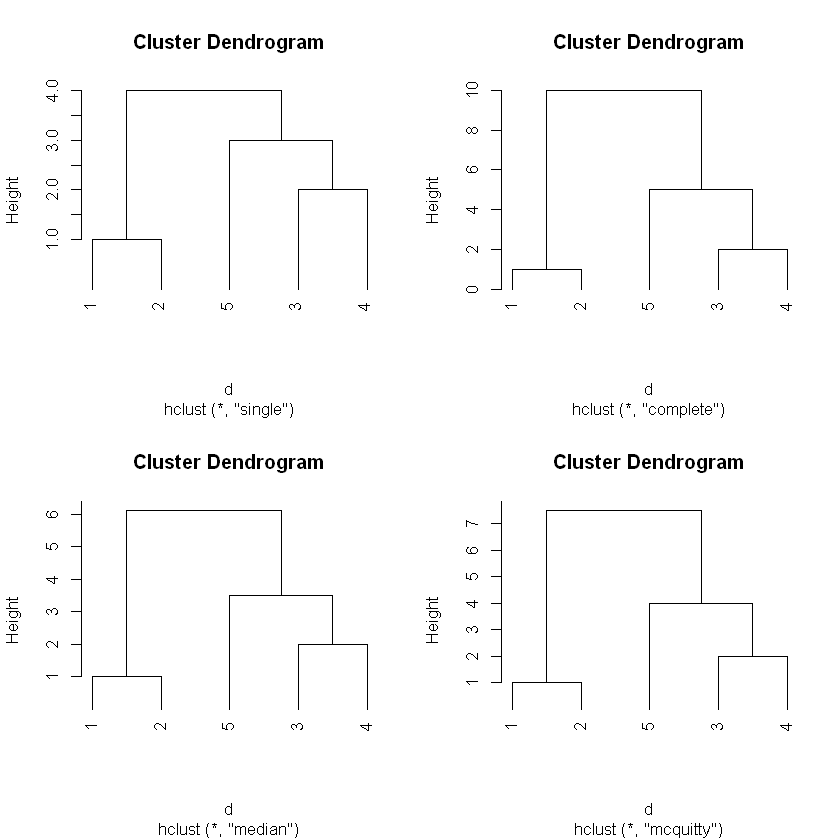

In [5]:
x<-c(1,2,6,8,11); 
dim(x)<-c(5,1); 
d<-dist(x) #生成距离结构
hc1<-hclust(d, "single"); hc2<-hclust(d, "complete")
hc3<-hclust(d, "median"); hc4<-hclust(d, "mcquitty") #生成系统聚类
opar <- par(mfrow = c(2, 2))
plot(hc1,hang=-1); plot(hc2,hang=-1)
plot(hc3,hang=-1); plot(hc4,hang=-1)
par(opar)#  画出所有树形结构图，以2*2的形式画在一张图上

- hclust():进行系统聚类的计算
- plot():画出系统聚类的树形图
hclust(d, method = "complete")

- d:dist构成的距离结构，
- method:系统聚类的方法（默认为最长距离法），其参数有：
 - “single”：最短距离法
 - “complete”：最长距离法
 - “average”：类平均法
 - 
 
plot(x, labels = NULL, hang = 0.1, main = "Cluster 

Dendrogram", sb = NULL, xlab = NULL, ylab ="Height", ...)

x: hclust()函数生成的对象

hang: 表明树形图中各类的位置，取负值表示树形图中的类从底部画起

main: 绘图名称

### 动态聚类法
系统聚类：一次形成类后就不再改变；
动态聚类：逐步聚类

#### 基本思路

首先粗略分类，然后按某种最优原则修改不合理的分类，直至分得比较合理为止，形成最终分类结果。

#### 程序

kmeans(x, centers, *iter.max*=10, *nstart*=1, algorithm*=c(“Hartigan-Wong”, “Lloyd”, “MacQueen”))

- x是由数据构成的矩阵或数据框，
- centers是聚类的个数或者初始类的中心，
- iter.max为最大迭代次数（最大值为10），
- nstart是随机集合的个数，
- algorithm是动态聚类的算法。

In [11]:
x<-c(1,2,6,8,11)
kmeans(x,2)

K-means clustering with 2 clusters of sizes 2, 3

Cluster means:
      [,1]
1 1.500000
2 8.333333

Clustering vector:
[1] 1 1 2 2 2

Within cluster sum of squares by cluster:
[1]  0.50000 12.66667
 (between_SS / total_SS =  81.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

![jupyter](https://cdn.jsdelivr.net/gh/ChangQingAAS/for_picgo/img/20220118145044.png)


![jupyter](https://cdn.jsdelivr.net/gh/ChangQingAAS/for_picgo/img/20220118145402.png)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



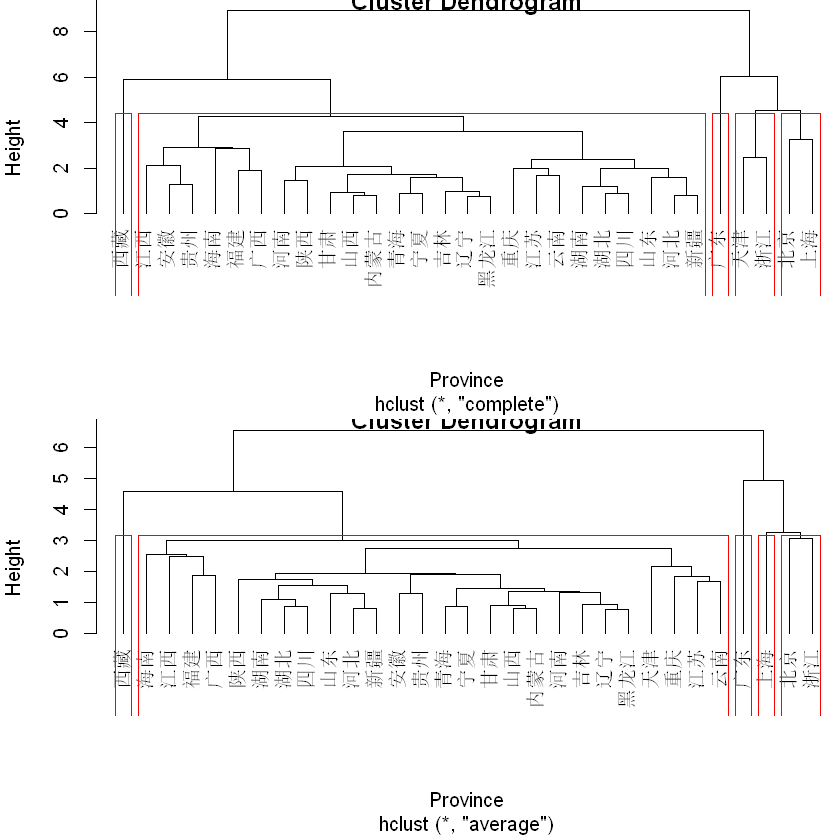

In [3]:
X<-data.frame(
   x1=c(2959.19, 2459.77, 1495.63, 1046.33, 1303.97, 1730.84, 1561.86, 1410.11, 3712.31, 2207.58, 2629.16, 1844.78, 2709.46, 1563.78, 1675.75, 1427.65, 1783.43, 1942.23, 3055.17, 2033.87, 2057.86, 2303.29, 1974.28, 1673.82, 2194.25, 2646.61, 1472.95, 1525.57, 1654.69, 1375.46, 1608.82), 
   x2=c(730.79, 495.47, 515.90, 477.77, 524.29, 553.90, 492.42, 510.71, 550.74, 449.37, 557.32, 430.29, 428.11, 303.65, 613.32, 431.79, 511.88, 512.27, 353.23, 300.82, 186.44, 589.99, 507.76, 437.75, 537.01, 839.70, 390.89, 472.98, 437.77, 480.99, 536.05),
   x3=c(749.41, 697.33, 362.37, 290.15, 254.83, 246.91, 200.49, 211.88, 893.37, 572.40, 689.73, 271.28, 334.12, 233.81, 550.71, 288.55, 282.84, 401.39, 564.56, 338.65, 202.72, 516.21, 344.79, 461.61, 369.07, 204.44, 447.95, 328.90, 258.78, 273.84, 432.46), 
   x4=c(513.34, 302.87, 285.32, 208.57, 192.17, 279.81, 218.36, 277.11, 346.93, 211.92, 435.69, 126.33, 160.77, 107.90, 219.79, 208.14, 201.01, 206.06, 356.27, 157.78, 171.79, 236.55, 203.21, 153.32, 249.54, 209.11, 259.51, 219.86, 303.00, 317.32, 235.82),
   x5=c(467.87, 284.19, 272.95, 201.50, 249.81, 239.18, 220.69, 224.65, 527.00, 302.09, 514.66, 250.56, 405.14, 209.70,272.59, 217.00, 237.60, 321.29, 811.88, 329.06, 329.65, 403.92, 240.24, 254.66, 290.84, 379.30, 230.61, 206.65, 244.93, 251.08, 250.28),
   x6=c(1141.82, 735.97, 540.58, 414.72, 463.09, 445.20, 459.62, 376.82, 1034.98, 585.23, 795.87, 513.18, 461.67, 393.99, 599.43, 337.76, 617.74, 697.22, 873.06, 621.74, 477.17, 730.05, 575.10, 445.59, 561.91, 371.04, 490.90, 449.69, 479.53, 424.75, 541.30),
   x7=c(478.42, 570.84, 364.91, 281.84, 287.87, 330.24, 360.48, 317.61, 720.33, 429.77, 575.76, 314.00, 535.13, 509.39, 371.62, 421.31, 523.52, 492.60, 1082.82, 587.02, 312.93,438.41, 430.36, 346.11, 407.70, 269.59, 469.10, 249.66, 288.56, 228.73, 344.85),
   x8=c(457.64, 305.08, 188.63, 212.10, 192.96, 163.86, 147.76, 152.85, 462.03, 252.54, 323.36, 151.39, 232.29, 160.12, 211.84, 165.32, 182.52, 226.45, 420.81, 218.27, 279.19, 225.80, 223.46, 191.48, 330.95, 389.33, 191.34, 228.19, 236.51, 195.93, 214.40),
   row.names = c("北京", "天津", "河北", "山西", "内蒙古", "辽宁", "吉林", "黑龙江", "上海", "江苏", "浙江", "安徽", "福建", "江西", "山东",  "河南", "湖北", "湖南", "广东", "广西", "海南", "重庆", "四川", "贵州", "云南", "西藏", "陕西", "甘肃", "青海", "宁夏", "新疆")
)

Province<-dist(scale(X))
hc1<-hclust(Province, "complete")
hc2<-hclust(Province, "average")
hc3<-hclust(Province, "centroid")
hc4<-hclust(Province, "ward")

opar<-par(mfrow=c(2,1), mar=c(5.2,4,0,0))
plot(hc1,hang=-1)
re1<-rect.hclust(hc1,k=5,border="red")
plot(hc2,hang=-1)
re2<-rect.hclust(hc2,k=5,border="red")
par(opar)

In [4]:
 kmeans(scale(X),5)


K-means clustering with 5 clusters of sizes 4, 6, 1, 4, 16

Cluster means:
          x1          x2         x3         x4          x5         x6
1  1.8603262  0.48933532  1.8245115  1.9535741  2.10205782  2.0677642
2  0.2681592  0.36385418  0.6773026 -0.0761060  0.01145940  0.4330305
3  1.1255255  2.91079330 -1.0645632 -0.4082114  0.53291392 -1.0476079
4  0.2029830 -1.53019285 -0.6594861 -1.0978219  0.05751333 -0.4270452
5 -0.6867323 -0.05815552 -0.4787096 -0.1598851 -0.57749718 -0.5070907
          x7         x8
1  1.6888083  1.9636868
2  0.1275875  0.1786530
3 -0.9562089  1.6612664
4  0.3315452 -0.2336878
5 -0.4931706 -0.6033238

Clustering vector:
  北京   天津   河北   山西 内蒙古   辽宁   吉林 黑龙江   上海   江苏   浙江 
     1      2      5      5      5      5      5      5      1      2      1 
  安徽   福建   江西   山东   河南   湖北   湖南   广东   广西   海南   重庆 
     5      4      4      2      5      5      2      1      4      4      2 
  四川   贵州   云南   西藏   陕西   甘肃   青海   宁夏   新疆 
     5      5      2      3  

## 主成分分析法

### 基本思想

实际问题中的变量的重要性有所不同，且众多变量间有一定的相关关系。通过这种相关性对这些变量加以改造，用为数较少的新变量反映原变量提供的大部分信息，简化原问题。即数据降维

主成分分析法就是在这种降维思想下产生的处理高维数据的统计方法。

### 基本方法

通过适当构造原变量的线性组合，产生一列互不相关的新变量，从中选出少数几个新变量并使它们含有尽可能多的原变量带有的信息，从而使用少数几个新变量代替原变量，以分析原问题。

变量中所含“信息”的大小通常用该变量的方差或样本方差来度量。

如常数a,Var(a) = 0 ,我们通过a，只能知道a这个常数，其所含信息少。

### 主成分的定义

设$X = (X_{1}, X_{2},……,X_{p})^{T}$为实际问题涉及的p个随机变量构成的向量，记X的均值为$\mu$，协方差阵为$\sum$.

考虑线性组合
$$
\left\{
\begin{aligned}
Y_{1} &  = & a_{1}^{T}X \\
. \\
. \\
Y_{p} &  = & a_{p}^{T}X \\
\end{aligned}
\right.
$$
 

#### 求矩阵的特征值和特征向量
 

In [10]:
a <- c(1, -2, 0, -2, 5, 0, 0, 0, 2)
# 由向量a构造一3列的矩阵， byrow=T表示生成矩阵的数据按行放置；
b <- matrix(data = a, ncol = 3, byrow = T)
c <- eigen(b) # 求b的特征值与特征向量
c

eigen() decomposition
$values
[1] 5.8284271 2.0000000 0.1715729

$vectors
           [,1] [,2]      [,3]
[1,] -0.3826834    0 0.9238795
[2,]  0.9238795    0 0.3826834
[3,]  0.0000000    1 0.0000000


其中涉及函数的用法：

- matrix (data=NA, nrow=1, ncol=1, byrow=FALSE,dimnames=NULL)
- data:向量数据；nrow:矩阵行数；ncol:矩阵列数；
- byrow=TRUE:生成矩阵的数据按行放置；
  - byrow=FALSE(默认值):数据按列放置；
- dianames:数组维（如矩阵行与列）的名字，默认值为空；
- A=matrix(1:15, nrow=3, ncol=5, byrow=T)
  - 与下面两格式等价
    - A=matrix(1:15, nrow=3, byrow=T)
    - A=matrix(1:15, ncol=5, byrow=T)

根据30名中学生的身高（X1）、体重（X2）、胸围（X3）和坐高（X4）数据，对这30名中学生身体的4项指标作主成分分析。

![jupyter](https://cdn.jsdelivr.net/gh/ChangQingAAS/for_picgo/img/20220118150323.png)

In [5]:
#用数据框形式输入数据
student<-data.frame(
 X1=c(148, 139, 160, 149, 159, 142, 153, 150, 151, 139, 
140, 161, 158, 140, 137, 152, 149, 145, 160, 156, 
151, 147, 157, 147, 157, 151, 144, 141, 139, 148), 
X2=c(41, 34, 49, 36, 45, 31, 43, 43, 42, 31, 
 29, 47, 49, 33, 31, 35, 47, 35, 47, 44,
 42, 38, 39, 30, 48, 36, 36, 30, 32, 38),
X3=c(72, 71, 77, 67, 80, 66, 76, 77, 77, 68, 
 64, 78, 78, 67, 66, 73, 82, 70, 74, 78, 
73, 73, 68, 65, 80, 74, 68, 67, 68, 70),
X4=c(78, 76, 86, 79, 86, 76, 83, 79, 80, 74, 
74, 84, 83, 77, 73, 79, 79, 77, 87, 85, 
82, 78, 80, 75, 88, 80, 76, 76, 73, 78)
)


In [6]:
student.pr<-princomp(student, cor=TRUE)
# 作主成分分析
summary(student.pr, loadings=TRUE)

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4
Standard deviation     1.8817805 0.55980636 0.28179594 0.25711844
Proportion of Variance 0.8852745 0.07834579 0.01985224 0.01652747
Cumulative Proportion  0.8852745 0.96362029 0.98347253 1.00000000

Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4
X1  0.497  0.543  0.450  0.506
X2  0.515 -0.210  0.462 -0.691
X3  0.481 -0.725 -0.175  0.461
X4  0.507  0.368 -0.744 -0.232

- Standard deviation：各主成分的标准差，即相应特征值的 开方；
- Proportion of Variance：各主成分的贡献率；
- Cumulative Proportion：各主成分的累积贡献率。
  - 此例中前两个主成分的累积贡献率已达96%，所以另外两个 主成分可以舍去，达到降维。
- Loadings: 载荷矩阵（主成分的系数），每列为相应特征值对应的单位正交化特征向量, 每列对应一主成分的系数;
  - 如Y1=-0.497X1-0.515X2-0.481X3-0.507X4。

由载荷矩阵可看到第1主成分对应系数的符号都相同, 其值在0.5左右, 反映了中学生身材的魁梧程度:身材高大的同学对应的X1, X2, X3, X4这4个指标都比较大,第1主成分的值就较小(第1主成分系数均为负值);身材娇小的同学第1主成分就较大.称第1主成分为大小因子.第2主成分是高度与围度的差(X1,X4系数为正, X2,X3系数为负),第2主成分大说明该同学瘦高, 称第2主成分是体形因子.

进一步, 还可通过样本主成分的观测值(predict()的结果)和散点图(biplot()的结果)来分析每位同学的体形和健康因素.

1.princomp(x, cor=FALSE):主成分分析的命令
   - x:用于主成分分析的数据，以数值矩阵和数据框形式给出；
   - cor=FALSE（默认值）：用样本的协方差阵作主成分分析；
     - cor=TRUE：用样本的相关矩阵作主成分分析.
   - princomp(~X1+X2+X3+X4,data=student, cor=T) 同 princomp(student, cor=TRUE)

2.summary(object, loading=FALSE): 提取主成分的信息
   - object：princomp()得到的对象;
   - loading=FALSE: 不显示载荷矩阵.


In [7]:
student.pr$n #输出样本观测数 

[1] 30

In [8]:
student.pr$sdev #输出主成分的标准差


Comp.1    Comp.2    Comp.3    Comp.4 
1.8817805 0.5598064 0.2817959 0.2571184

In [9]:
student.pr$center #输出原始变量的均值


X1        X2        X3        X4 
149.00000  38.70000  72.23333  79.36667

In [10]:
student.pr$scale #输出原始变量的标准差


X1       X2       X3       X4 
7.192589 6.351640 5.064144 4.199074

In [11]:
student.pr$scores #主成分的观测值,将样本数据代入主成分的值 (输出为矩阵)

Comp.1,Comp.2,Comp.3,Comp.4
-0.06990950,-0.23813701,0.35509248,-0.266120139
-1.59526340,-0.71847399,-0.32813232,-0.118056646
2.84793151,0.38956679,0.09731731,-0.279482487
-0.75996988,0.80604335,0.04945722,-0.162949298
2.73966777,0.01718087,-0.36012615,0.358653044
-2.10583168,0.32284393,-0.18600422,-0.036456084
1.42105591,-0.06053165,-0.21093321,-0.044223092
0.82583977,-0.78102576,0.27557798,0.057288572
0.93464402,-0.58469242,0.08814136,0.181037746
-2.36463820,-0.36532199,-0.08840476,0.045520127


predict(object):主成分的观测值,将样本数据代入主成分的值(输出为矩阵), 与object$scores输出结果相同

object: princomp()得到的对象.

screeplot(object, type=c("barplot ", "lines")) : 画崖底碎石图

object: princomp()得到的对象;

type: 画出碎石图的类型, barplot是直方图类型, lines是直线图
类型, 默认为直方图类型;

plot(object)同screeplot.

可根据崖底碎石图的拐点确定主成分个数. 


biplot(object, choice=1:2): 画出数据关于主成分的散点图和原坐标在主成分下的方向;
分别以主成分1,2作为横纵坐标, 计算原始样本数据的1,2主成分的值, 在此坐标轴画出散点图.
- object: princomp()得到的对象;
- choice: 选择的主成分, 默认值是第1第2主成分. 

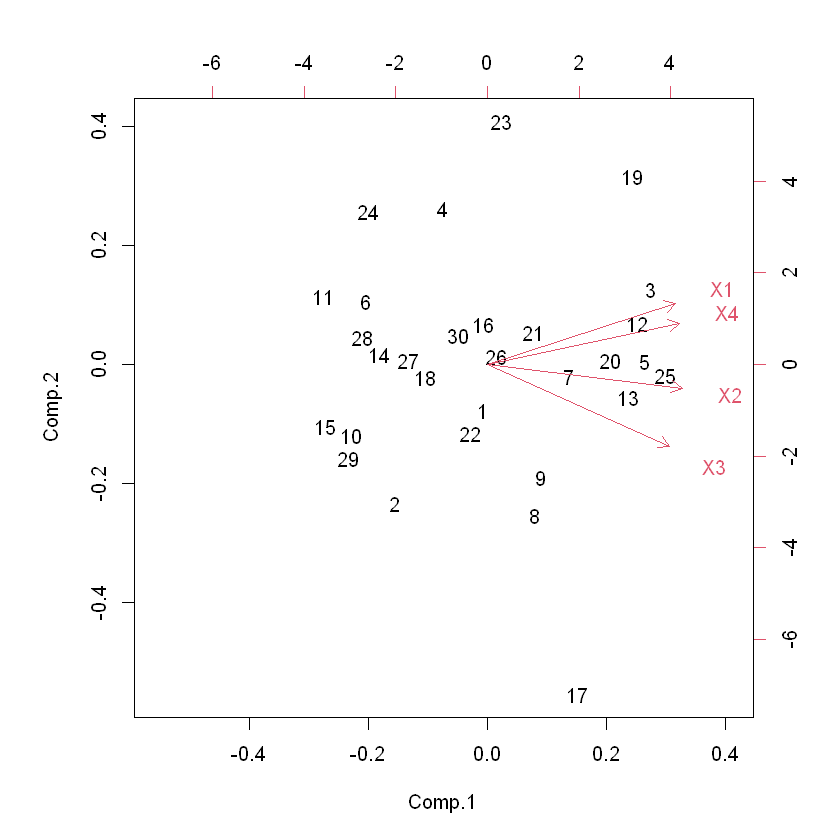

In [13]:
biplot(student.pr)


上图根据30名同学的第1,2主成分的数值画出散点图, 从中可看出23号同学的第二主成分比较大, 11,15号同学的第一主成分比较大.同时上图红色箭头表示X1等由Y1,Y2表出的向量图.

根据eg1程序结果分析: 由累积贡献率或崖底碎石图判断,选取前两个主成分即可.


### 应用R软件进行因子分析

示例：对10名学生数学（X1）、物理（X2）、化学（X3）、语文（X4）、英语（X5）考试成绩数据进行因子分析


In [32]:
chengji<-read.table('./asset/student.txt',header =  T) 
chengji

X1,X2,X3,X4,X5
<int>,<int>,<int>,<int>,<int>
45,89,56,56,81
58,90,56,56,56
88,85,99,44,85
85,66,55,66,45
35,49,96,85,63
45,58,56,56,48
58,97,56,56,78
48,85,99,44,68
65,76,55,66,27


In [36]:
fact1<-factanal(x=chengji, factors=2, scores= "Bartlett")

 factors=2表示选取两个因子， scores= “Bartlett”表示采用“Bartlett”方法（加权最小二乘法）求因子得分（即得到因子的估计值）
        
factanal:因子分析的命令


In [37]:
fact1



Call:
factanal(x = chengji, factors = 2, scores = "Bartlett")

Uniquenesses:
   X1    X2    X3    X4    X5 
0.622 0.227 0.005 0.171 0.419 

Loadings:
   Factor1 Factor2
X1  0.572  -0.226 
X2  0.844  -0.246 
X3          0.993 
X4 -0.908         
X5  0.755   0.108 

               Factor1 Factor2
SS loadings      2.443   1.114
Proportion Var   0.489   0.223
Cumulative Var   0.489   0.711

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 0.27 on 1 degree of freedom.
The p-value is 0.606 

1.其中SS loadings表示载荷矩阵中每列元素的平方和，第一个元素表示第一个潜在因子对所有变量的总影响，第二个元素表示第二个潜在因子对所有变量的总影响。

2.Test of the hypothesis that 2 factors are sufficient.表示认为
    两个因子比较合理， p-value是假设检验的参数值。
